# Matplotlib usages with contextplt
This page illustrates various usages of matplotlib with contextplt.  

Initial imports of pacakges looks very heavy but this intend to create multiple forms of figures as functions. 


In [1]:
from typing import Union, Optional, List, Dict, Callable, Any, Tuple
from types import ModuleType
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import seaborn as sns

import contextplt as cplt

Here, anes96 data set is used. Dataset information is described <a href=https://www.statsmodels.org/devel/datasets/generated/anes96.html>here</a>.  
Somtimes, functions for creation of figures are prepared in order for reproducibility.

In [2]:
# https://www.statsmodels.org/devel/datasets/generated/anes96.html
anes96 = sm.datasets.anes96
df = anes96.load_pandas().data
x = "age"
y = "logpopul"
c = "educ"

## Text placement. 

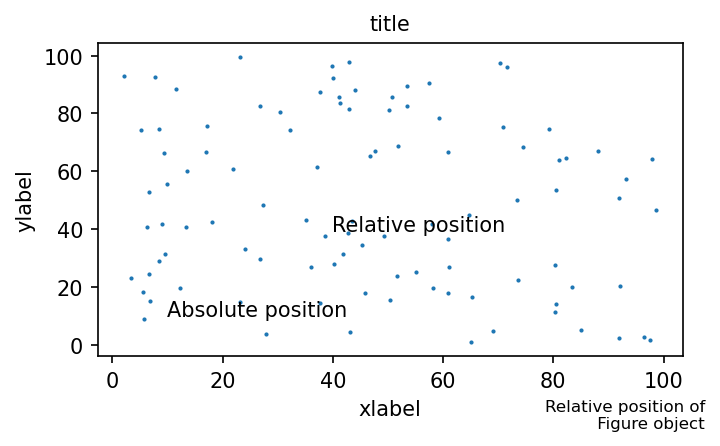

In [3]:
x = np.random.rand(100)*100
y = np.random.rand(100)*100
with cplt.Single(xlabel="xlabel", ylabel="ylabel", title="title") as p:
    p.ax.scatter(x,y, s=1)
    p.ax.text(10, 10, "Absolute position")
    p.ax.text(0.4,0.4, "Relative position", transform=p.ax.transAxes)
    p.ax.text(0.95,0.03, "Relative position of\n Figure object", 
                transform=p.fig.transFigure, fontsize=8, ha="right")

## Legend placement 

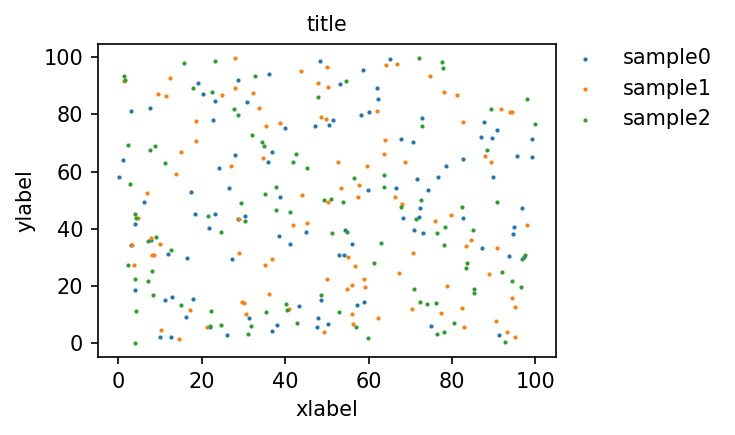

In [4]:
with cplt.Single(xlabel="xlabel", ylabel="ylabel", title="title") as p:
    for i in range(3):
        x = np.random.rand(100)*100
        y = np.random.rand(100)*100
        p.ax.scatter(x,y, s=1, label=f"sample{i}")
    plt.legend(loc=(1.00,0.7), frameon=False)

Create a custom legend

In [5]:
def create_patch_for_label(
    label_names: List[str], 
    label_title: str = "", 
    cmap_name: str = "tab10", 
    color : Union[List[str], List[Tuple]] = None,
    line : bool = False,
    ) -> List[mpatches.Patch]:
    """Create list of patches for legend.

    Args:
        label_names : list of label names. 
        label_title : title of label handle.
        cmap_name : colormap name. 
        color : If color is specified, use this color set to display.
        line : legend becomes line style. 

    Examples:
        >>> patches = gallery.create_patch_for_label(label_names = ["test1", "test2", "test3"], color=["red","blue", "orange"] , line=True)
        >>> fig = plt.figure(figsize=(6,6), dpi=300 )
        >>> ax = fig.add_subplot(111)
        >>> ax.axes.xaxis.set_visible(False)
        >>> ax.axes.yaxis.set_visible(False)
        >>> plt.legend(handles=patches, frameon=False)
        >>> plt.show()
    """
    cmap = plt.get_cmap(cmap_name)
    patches = []
    for i, name in enumerate(label_names):
        if name == "NAN":
            c = "grey"
        elif color == None:
            c = cmap(i)
        else:
            c = color[i]
            
        if line:
            patch = Line2D([0], [0], color=c, label=name)
        else:
            patch = mpatches.Patch(color=c, label=name)
        patches.append(patch)
    return(patches)

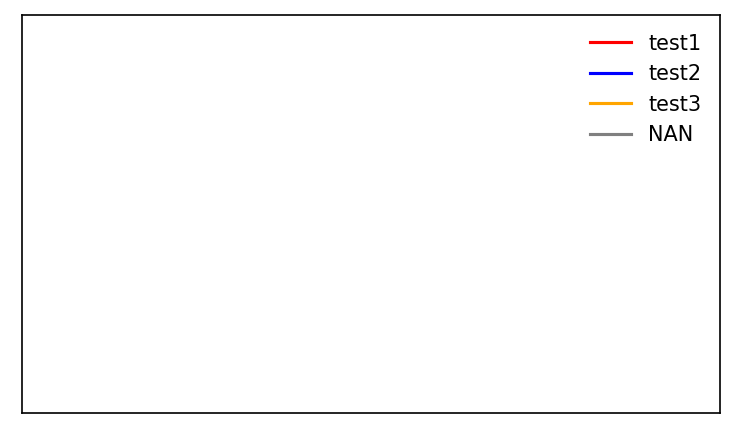

In [6]:
patches = create_patch_for_label(label_names = ["test1", "test2", "test3", "NAN"], 
                                 color=["red","blue", "orange", "grey"] , line=True)
with cplt.Single() as p:
    p.ax.axes.xaxis.set_visible(False)
    p.ax.axes.yaxis.set_visible(False)
    plt.legend(handles=patches, frameon=False)

# Continuous to continuous 

### Simple scatter plot.

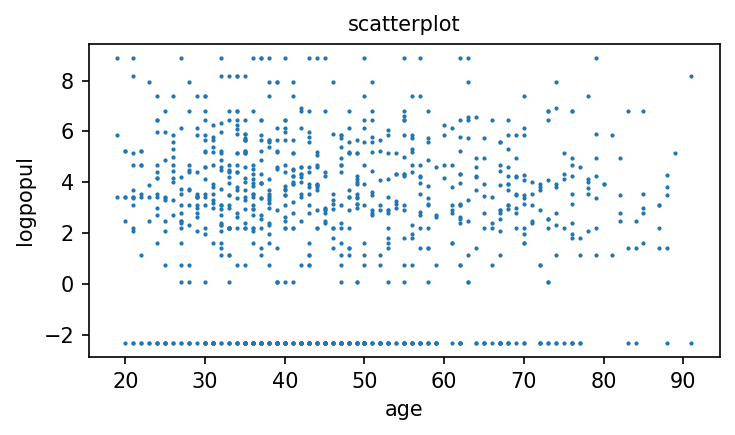

In [7]:
x = "age"
y = "logpopul"
with cplt.Single(xlabel=x, ylabel=y, title="scatterplot") as p:
    p.ax.scatter(df[x], df[y], s=1)

### Linear regression

In [8]:
def scatter_with_linear_reg(df : pd.DataFrame, x : str, y : str) -> None:
    with cplt.Single(
       xlabel=f"log[{x}]", 
       ylabel=y, 
       title="scatter with linear regression", 
       xlim=[10, 95]
    ) as p:
        sns.regplot(data=df, x=x, y=y, ax=p.ax, 
                    scatter_kws=dict(s=1, color="purple"), 
                    line_kws=dict(color="green"))

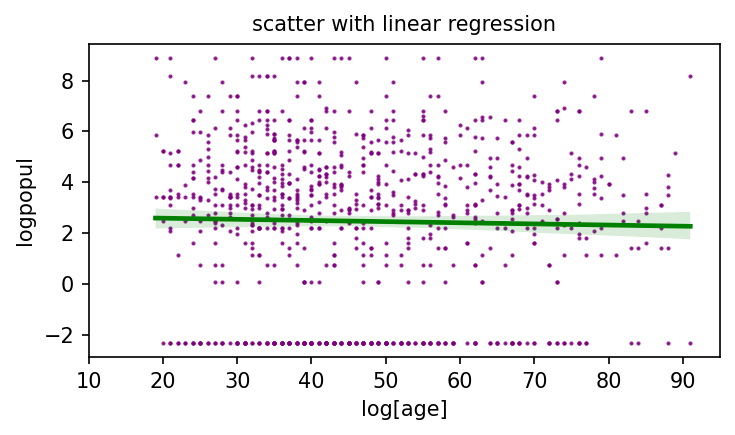

In [9]:
x = "age"
y = "logpopul"
scatter_with_linear_reg(df,x ,y)

### Contourplot 

In [10]:
def contourplot(df : pd.DataFrame, x : str, y : str) -> None:
    with cplt.Single(figsize=(6,5), title=f"contour plot. {x} and {y}") as p:
        sns.kdeplot(data=df, x=x, y =y, 
                    common_norm=False, fill=True, ax=p.ax, n_levels=10, 
                    cbar=True, thresh=0, cmap='viridis' )

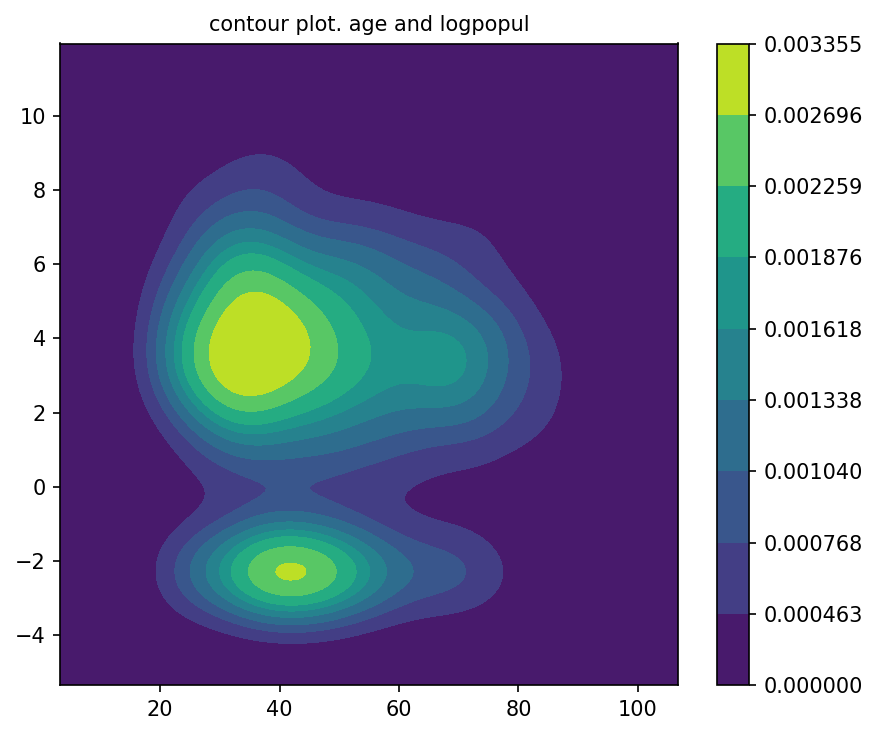

In [11]:
x = "age"
y = "logpopul"
contourplot(df, x, y)

### 2d histogram

In [12]:
def histogram2d(df: pd.DataFrame, x : str, y : str, 
                bins : Tuple[int,int], rng : Tuple[Tuple[int,int,], Tuple[int,int]]
                ) -> None:
    with cplt.Single(xlabel=x, ylabel=y, title="2D histogram",
                           figsize=(7,5)) as p:
        H =  p.ax.hist2d(df[x], df[y], bins=bins, cmap=plt.cm.jet, 
                         density=True, cmin=0, cmax=None, range=rng)
        p.fig.colorbar(H[3],ax=p.ax)

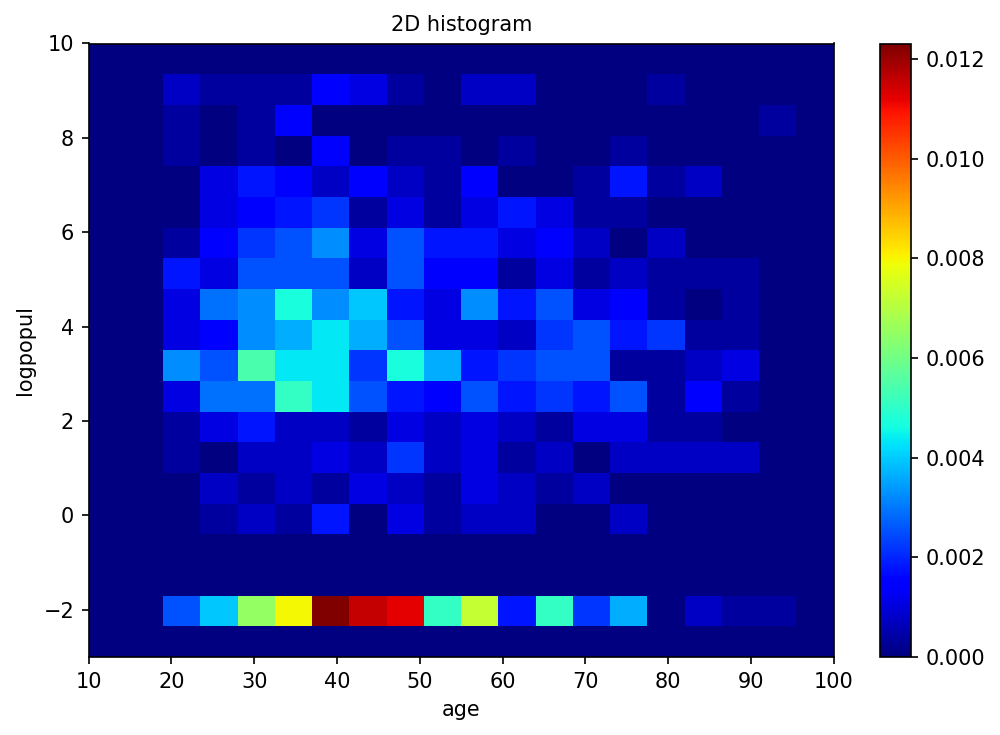

In [13]:
x = "age"
y = "logpopul"
bins = (20,20)
rng= ((10,100), (-3, 10))
histogram2d(df, x, y, bins, rng)

## Continuous to continuous with stratification 

In [14]:
def stratified_scatter(ax, df_: pd.DataFrame, x: str, y: str, c: str) -> None:
    """
    
    Args:
        ax : axis object.
        df_ : dataframe to be plotted.
        x : a column name for x axis.
        y : a column name for y axis.
        c : a column name for stratification.
    """
    columns = sorted(df_[c].unique())
    for col in columns:
        cond = df_[c] == col
        dfM = df_.loc[cond]
        ax.scatter(dfM[x], dfM[y], s=1, label=str(col))
        plt.legend(bbox_to_anchor=(1, 0.98), frameon = False)

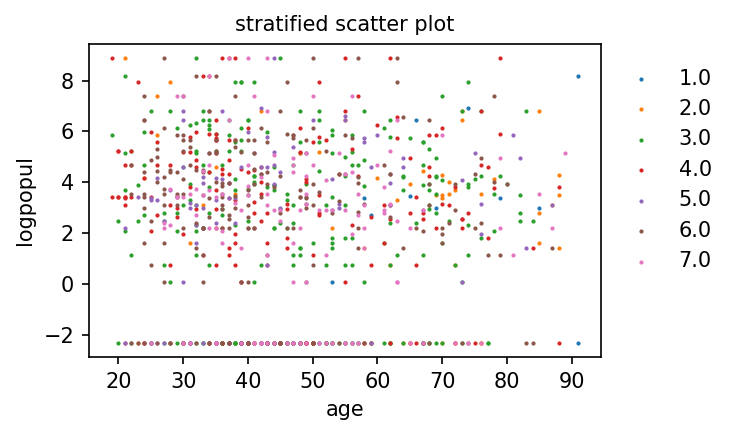

In [15]:
x = "age"
y = "logpopul"
c = "educ"
with cplt.Single(xlabel=x, ylabel=y, title="stratified scatter plot") as p:
    stratified_scatter(p.ax, df, x, y, c)

## Continuous with stratification

In [16]:
def stacked_histogram(df : pd.DataFrame, x : str, y : str, c : str) -> None:
    color_n = len(df[c].unique())
    palette = list(plt.cm.tab10.colors[:color_n])
    with cplt.Single() as p:
        sns.histplot(data=df,x=x,hue=c, fill=True, palette=palette , alpha=1 )

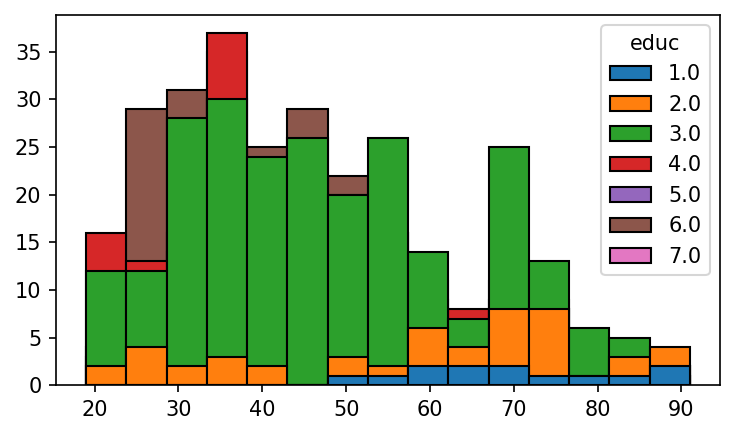

In [17]:
x = "age"
y = "logpopul"
c = "educ"
stacked_histogram(df, x, y, c)

###  kde density with stratification

In [18]:
def kde_density_with_stratification(
        df : pd.DataFrame, x : str, y : str, c : str
    ) -> None:
    color_n =  len(df[c].unique())
    palette = list(plt.cm.tab10.colors[:color_n])
    with cplt.Single() as p:
        sns.kdeplot(data=df, x=x, hue=c, ax=p.ax, 
                    common_norm=False, fill=True, alpha=0.3, bw_adjust=0.5, 
                    palette=palette)

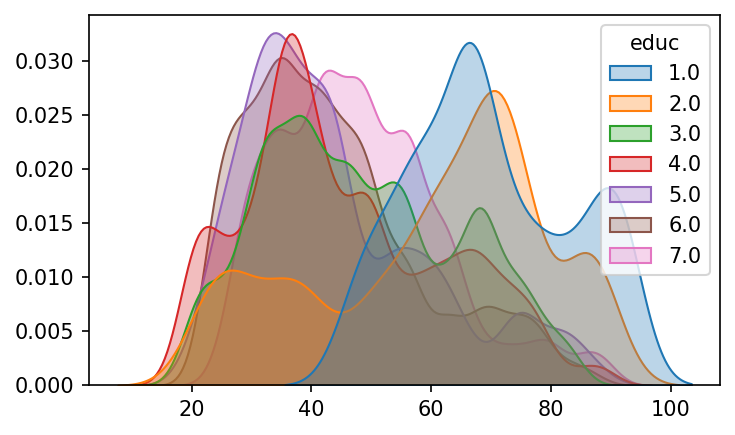

In [19]:
x = "age"
y = "logpopul"
c = "educ"
kde_density_with_stratification(df, x, y, c)

### kde density area plot

In [20]:
def kde_density_area_plot(
        df : pd.DataFrame, x : str, y : str, c : str
    ) -> None:
    color_n =  len(df[c].unique())
    palette = list(plt.cm.tab10.colors[:color_n])
    with cplt.Single() as p:
        sns.kdeplot(data=df, x=x, hue=c, ax=p.ax, 
                    common_norm=True, multiple="fill", fill=True, 
                    bw_adjust=0.5, palette=palette, alpha=1, linewidth=0.1 )
        move_legend(p.ax, bbox_to_anchor=(1,0.98))
        
def move_legend(ax, new_loc="upper left", **kws):
    """move legend created by seaborn. See issues in seaborn. 
    https://github.com/mwaskom/seaborn/issues/2280
    """
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

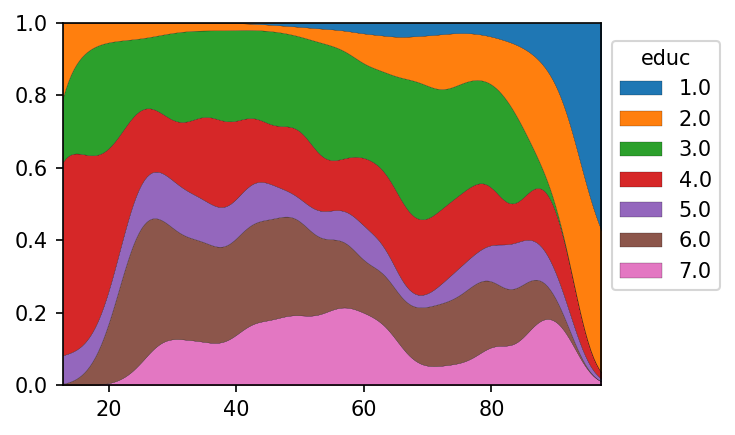

In [21]:
x = "age"
y = "logpopul"
c = "educ"
kde_density_area_plot(df, x, y, c)

###  Combined version of figures

In [22]:
def stacked_hist_kde_density_and_area_plot_with_stratification(
        df : pd.DataFrame, x : str, y : str, c : str,
    ) -> None:
    color_n =  len(df[c].unique())
    palette = list(plt.cm.tab10.colors[:color_n])
    with cplt.Multiple(figsize=(6,8), dpi=150,grid=(3,1), label_outer=True,
                             suptitle="stacked hist., kde density and area plot", 
                             ) as mul:
        with cplt.MulSingle(mul=mul, index=1) as p:
            sns.histplot(data=df,x=x,hue=c, fill=True, palette=palette , alpha=1, ax=p.ax)
            move_legend(p.ax, bbox_to_anchor=(1,0.98))

        with cplt.MulSingle(mul=mul, index=2) as p:
            sns.kdeplot(data=df, x=x, hue=c, ax=p.ax, 
                        common_norm=False, fill=True, alpha=0.3, bw_adjust=0.5, 
                        palette=palette )
            move_legend(p.ax, bbox_to_anchor=(1,0.98))

        with cplt.MulSingle(mul=mul, index=3) as p:
            sns.kdeplot(data=df, x=x, hue=c, ax=p.ax, 
                        common_norm=True, multiple="fill", fill=True, 
                        bw_adjust=0.5, palette=palette, alpha=1, linewidth=0.1 )
            move_legend(p.ax, bbox_to_anchor=(1,0.98))

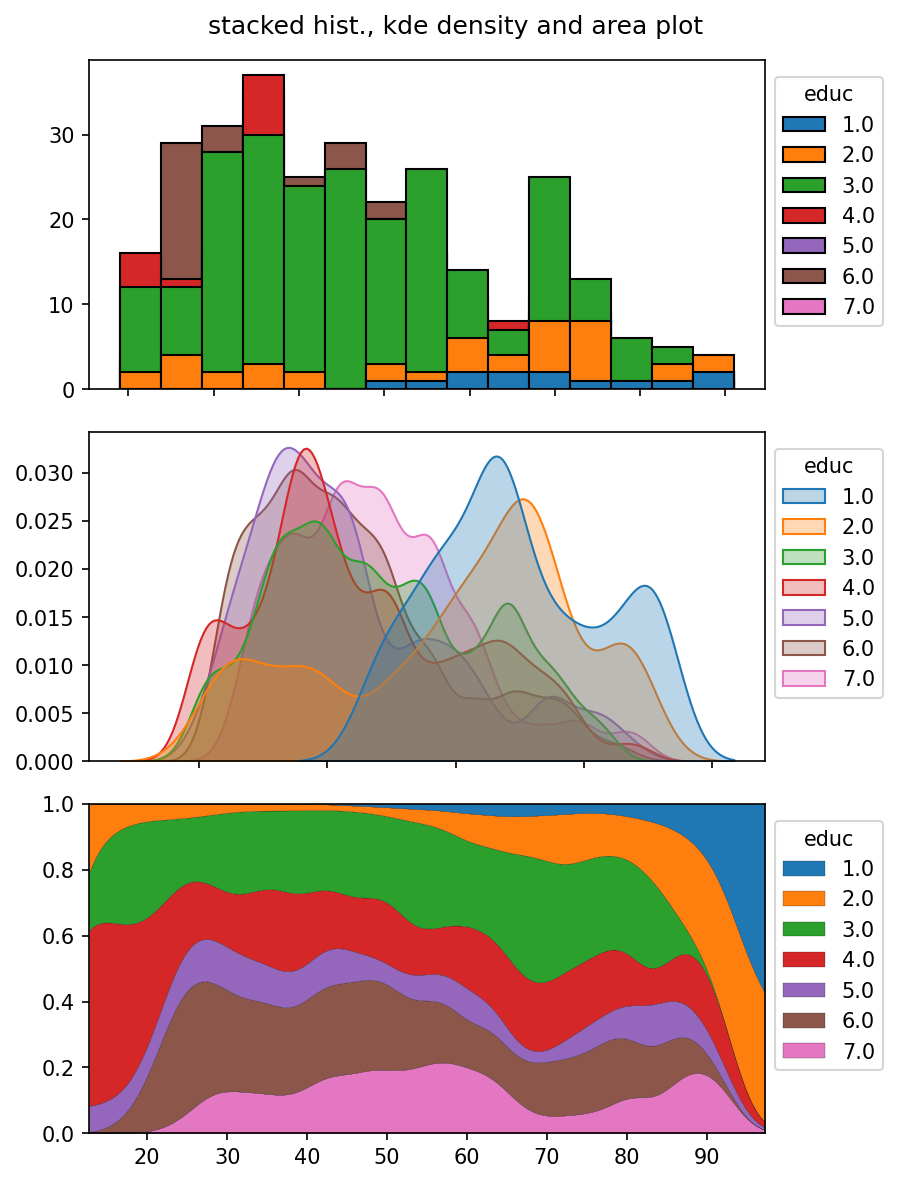

In [23]:
x = "age"
y = "logpopul"
c = "educ"
stacked_hist_kde_density_and_area_plot_with_stratification(df, x, y , c)

## Time series visualizeation 
Here, dataset is changed.

In [24]:
df = sm.datasets.get_rdataset("Melanoma", "MASS").data


### Time series barplot 

In [25]:
def time_series_simple_barplot(df : pd.DataFrame, x : str) -> None:
    """
    Args:
        df : dataframe.
        x : a column containing int data type, supposed to be year. 
        
    """
    ser = df["year"].value_counts()
    with cplt.Single(title="Yearly count of cases in dataset",
                     xlabel="year", ylabel="count", xrotation=90) as p:
        p.ax.bar(ser.index, ser.values, 
                 width=1, linewidth=0.1, 
                 color="paleturquoise", edgecolor="black")

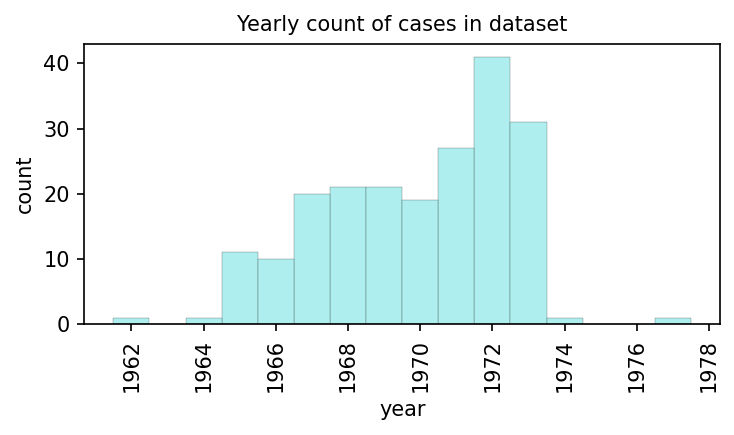

In [26]:
x = "year"
time_series_simple_barplot(df, x)

With a customizations

In [27]:
def time_series_barplot(df : pd.DataFrame, x : str) -> None:

    """
    Args:
        df : dataframe.
        x : a column containing datetime object.
    """
    ser = df["year_date"].value_counts()

    with cplt.Single(title="Yearly count of cases in dataset", 
                     xlabel="year", ylabel="count", 
                     xrotation=90) as p:
        p.ax.bar(ser.index, ser.values, 
                 width=365, linewidth=0.1, 
                 color="paleturquoise", edgecolor="black")
        p.ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))

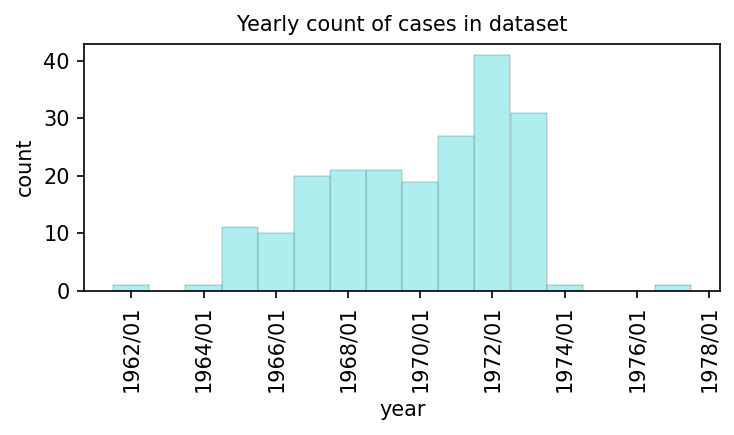

In [28]:
df["year_date"] = pd.to_datetime(df["year"].astype(str))
x = "year_date"
time_series_barplot(df, x)

In [29]:
def timeseries_heatmap(df : pd.DataFrame, time_col : str, c : str) -> None:

    df_ht = pd.crosstab(df[time_col], df[c])
    df_ht_per = pd.crosstab(df[time_col], df[c], normalize="index")*100
    # to impute non-existing years.
    for i in range(df_ht.index.min(), df_ht.index.max() + 1 ):
        if i not in df_ht.index:
            df_ht.loc[i] = 0
            df_ht_per.loc[i] =np.nan 
    df_ht = df_ht.sort_index()
    df_ht_per = df_ht_per.sort_index()

    tick_size=6
    with cplt.Multiple(grid=(1,2), figsize=(8,4)) as mul:
        with cplt.MulSingle(mul=mul, index=1,title="Count", 
                            xtickfontsize=tick_size, ytickfontsize=tick_size,
                           ) as p:
            ht = sns.heatmap(df_ht, ax=p.ax, cmap="Reds", fmt=".0f",
                            annot=True, linewidths=.2, annot_kws={"fontsize":6})
            #ht.set_xticklabels(ht.get_xmajorticklabels(), fontsize = tick_size)
            #ht.set_yticklabels(ht.get_ymajorticklabels(), fontsize = tick_size)

        with cplt.MulSingle(mul=mul, index=2,title="Percentage", 
                            xtickfontsize=6, ytickfontsize=6
                           ) as p:
            ht = sns.heatmap(df_ht_per, ax=p.ax, cmap="Reds", fmt=".1f",
                            annot=True, linewidths=.2, annot_kws={"fontsize":6})


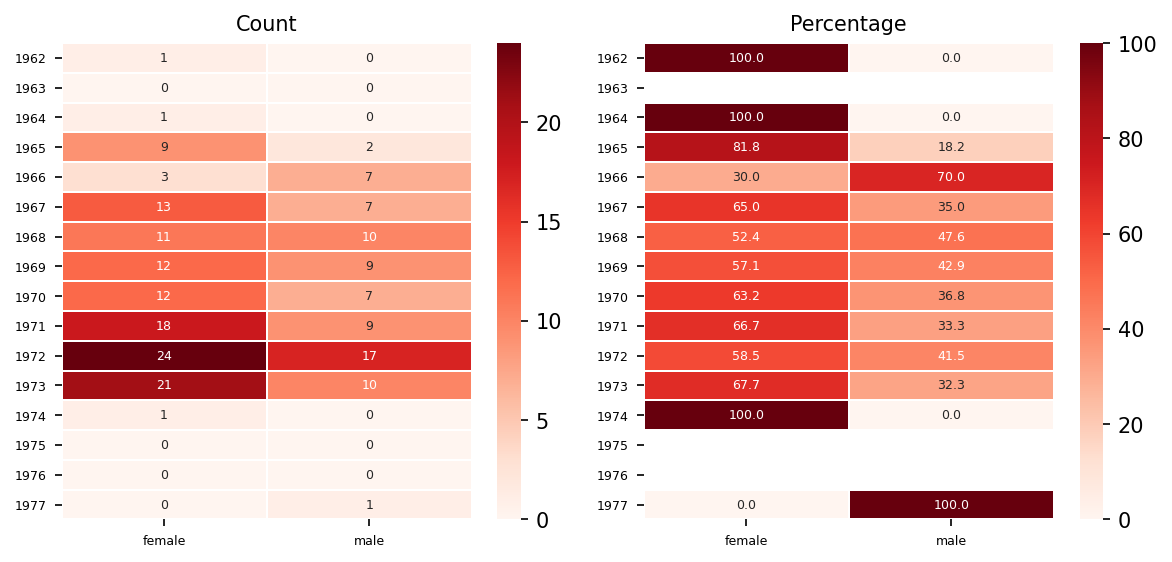

In [30]:
df = sm.datasets.get_rdataset("Melanoma", "MASS").data
# Change elements name for good visualization.
df["sex"] = df["sex"].replace({0:"female", 1:"male"})
time_col = "year"
c = "sex"
timeseries_heatmap(df, time_col, c)